In [56]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_tr = pd.read_csv("../res/train.csv")

In [36]:
cabin_split = df_tr['Cabin'].str.split('/').values
df_tr[['deck','number','side']] = df_tr['Cabin'].str.split('/',expand = True)

In [40]:
df_tr['deck'].unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [41]:
mapping = {'A': 0, 'B' : 1, 'C' : 2, 'D': 3, 'E': 4 , 'F': 5, 'G' : 6, 'T': 7}

In [50]:
df_tr['deck_map'] = df_tr['deck'].map(mapping)
df_tr['deck_map'] = df_tr['deck_map'].fillna(-1)
df_tr['deck_map'] = df_tr['deck_map'].astype(np.int32)

In [53]:
df_tr['side_map'] = df_tr['side'].map({'P' : 1, 'S':-1})
df_tr['side_map'] = df_tr['side_map'].fillna(0)
df_tr['side_map'] = df_tr['side_map'].astype(np.int32) 

In [70]:
df_tr['number'] = df_tr['number'].fillna(0)
df_tr['number'] = df_tr['number'].astype(np.int32)

In [76]:
df_tr

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,number,side,deck_map,side_map
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,5,-1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,0,-1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,0,-1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P,0,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,6,-1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S,6,-1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S,4,-1


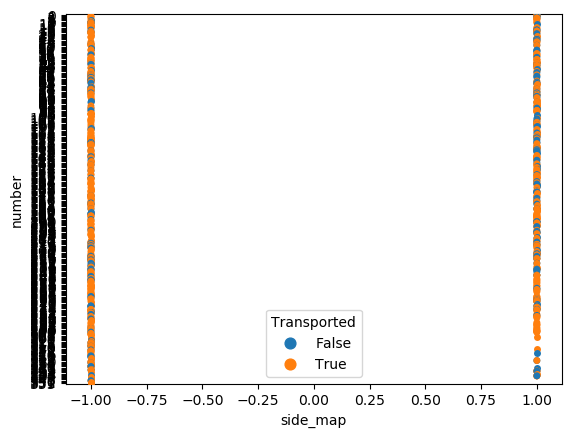

In [60]:
sns.stripplot(data=df_tr[df_tr.deck_map == 1], x='side_map', y = 'number', hue='Transported')
# df_tr.plot(x='side_map', y= 'number', kind="scatter", c="value", cmap="plasma")
# plt.show()

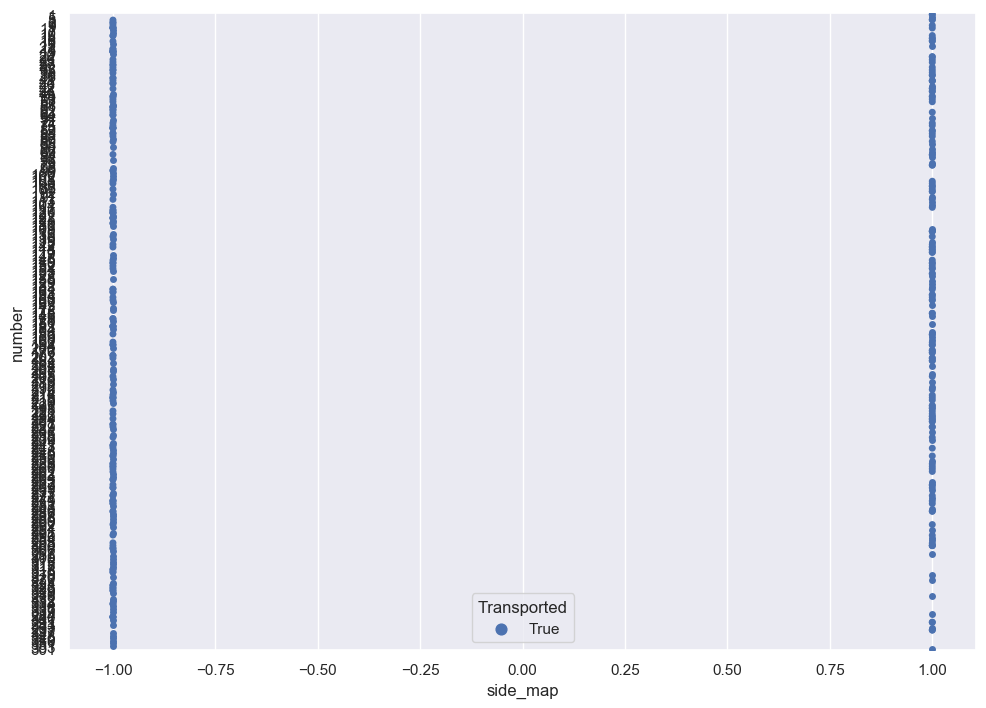

In [65]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.stripplot(data=df_tr[(df_tr.deck_map == 1) & (df_tr.CryoSleep == True) & (df_tr.Transported == True)], x='side_map', y = 'number', hue='Transported')
plt.show()

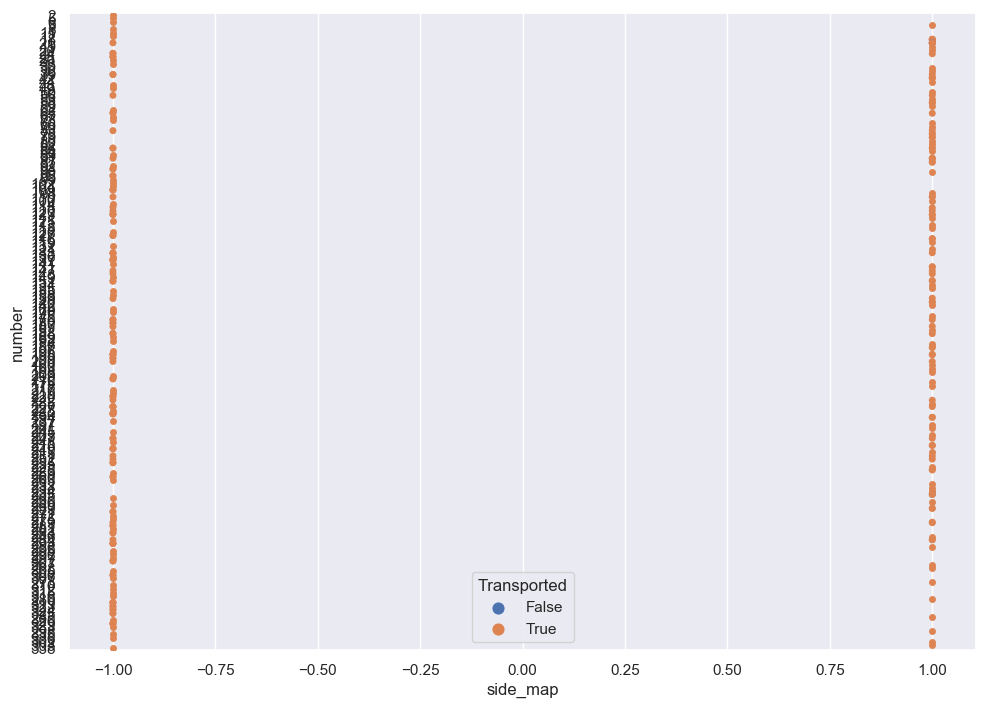

In [62]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.stripplot(data=df_tr[(df_tr.deck_map == 2) & (df_tr.CryoSleep == True)], x='side_map', y = 'number', hue='Transported')
plt.show()

In [84]:
df_tr[(df_tr.deck_map == 5) & (df_tr.CryoSleep == True) & (df_tr.Transported == True)].sort_values(by = 'number')[['Transported','Cabin','number']].head(30)

,Transported,Cabin,number
18,True,F/5/P,5
47,True,F/10/P,10
58,True,F/14/S,14
76,True,F/16/P,16
115,True,F/25/P,25
118,True,F/27/S,27
123,True,F/29/S,29
146,True,F/35/S,35
145,True,F/37/P,37
169,True,F/41/P,41


In [83]:
df_tr[(df_tr.deck_map == 5) & (df_tr.Transported == True)].sort_values(by = 'number')[['Transported','Cabin','number','CryoSleep']].head(30)

,Transported,Cabin,number,CryoSleep
1,True,F/0/S,0,False
5,True,F/0/P,0,False
4,True,F/1/S,1,False
12,True,F/1/P,1,False
6,True,F/2/S,2,False
14,True,F/2/P,2,False
8,True,F/3/S,3,False
18,True,F/5/P,5,True
33,True,F/9/P,9,False
34,True,F/9/P,9,False
